Файл data_perceptron.txt создан

Создан перцептрон с 2 входами и 1 выходом

НАЧАЛО ОБУЧЕНИЯ
Эпоха   0: ошибка = 0.0417, точность = 50.0%
Эпоха  15: ошибка = 0.0167, точность = 50.0%
Эпоха  30: ошибка = 0.0167, точность = 50.0%
Эпоха  45: ошибка = 0.0167, точность = 50.0%
Эпоха  60: ошибка = 0.0167, точность = 50.0%
Эпоха  75: ошибка = 0.0167, точность = 50.0%
Эпоха  90: ошибка = 0.0167, точность = 50.0%
Эпоха 105: ошибка = 0.0167, точность = 50.0%
Эпоха 120: ошибка = 0.0167, точность = 50.0%
Эпоха 135: ошибка = 0.0167, точность = 50.0%
Эпоха 149: ошибка = 0.0167, точность = 50.0%


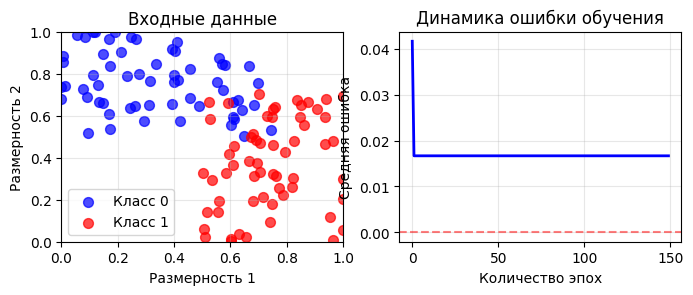

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(100)  
n_samples = 120  


class0_x = np.random.rand(n_samples//2) * 0.7  
class0_y = np.random.rand(n_samples//2) * 0.5 + 0.5  
class0 = np.column_stack([class0_x, class0_y])


class1_x = np.random.rand(n_samples//2) * 0.5 + 0.5  
class1_y = np.random.rand(n_samples//2) * 0.7  
class1 = np.column_stack([class1_x, class1_y])

data = np.vstack([class0, class1])
labels = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])


noise = np.random.normal(0, 0.03, data.shape) 
data += noise
data = np.clip(data, 0, 1)


with open('data_perceptron.txt', 'w') as f:
    for point, label in zip(data, labels):
        f.write(f"{point[0]:.4f} {point[1]:.4f} {int(label)}\n")
print("Файл data_perceptron.txt создан")


text = np.loadtxt('data_perceptron.txt')
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0], 1))


plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.scatter(data[labels[:, 0] == 0, 0], data[labels[:, 0] == 0, 1], 
            c='blue', label='Класс 0', alpha=0.7, s=50)  
plt.scatter(data[labels[:, 0] == 1, 0], data[labels[:, 0] == 1, 1], 
            c='red', label='Класс 1', alpha=0.7, s=50)  
plt.xlabel('Размерность 1')
plt.ylabel('Размерность 2')
plt.title('Входные данные')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1)


class SimplePerceptron:
    def __init__(self, dim_ranges, num_output):
        self.num_inputs = len(dim_ranges)
        self.num_output = num_output
        self.weights = np.random.randn(self.num_inputs + 1) * 0.3  
        self.dim_ranges = dim_ranges
        
    def train(self, data, labels, epochs=150, show=15, lr=0.04): 
        n_samples = data.shape[0]
        error_history = []
        
        for epoch in range(epochs):
            total_error = 0
            
            for i in range(n_samples):
                x_with_bias = np.concatenate([[1], data[i]])
                target = labels[i][0]
                
                net_input = np.dot(x_with_bias, self.weights)
                output = 1 if net_input >= 0 else 0
                
                error = target - output
                total_error += abs(error)
                
                momentum = 0.8 
                weight_update = lr * error * x_with_bias
                self.weights = self.weights * momentum + weight_update * (1 - momentum)
            
            avg_error = total_error / n_samples
            error_history.append(avg_error)
            
            if show > 0 and (epoch % show == 0 or epoch == epochs-1):
                predictions = []
                for j in range(n_samples):
                    x_with_bias = np.concatenate([[1], data[j]])
                    net_input = np.dot(x_with_bias, self.weights)
                    predictions.append(1 if net_input >= 0 else 0)
                accuracy = np.mean(np.array(predictions) == labels.flatten()) * 100
                print(f'Эпоха {epoch:3d}: ошибка = {avg_error:.4f}, точность = {accuracy:.1f}%')
            
            if total_error == 0:
                print(f'Обучение завершено на эпохе {epoch}')
                break
        
        return np.array(error_history)
    
    def sim(self, data):
        predictions = []
        for x in data:
            x_with_bias = np.concatenate([[1], x])
            net_input = np.dot(x_with_bias, self.weights)
            predictions.append(1 if net_input >= 0 else 0)
        return np.array(predictions)


num_output = 1
perceptron = SimplePerceptron([[0, 1], [0, 1]], num_output)

print(f"\nСоздан перцептрон с 2 входами и {num_output} выходом")

print("\n" + "="*50)
print("НАЧАЛО ОБУЧЕНИЯ")
print("="*50)
error_progress = perceptron.train(data, labels, epochs=150, show=15, lr=0.04) 


plt.subplot(2, 2, 2)
plt.plot(error_progress, 'b-', linewidth=2)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.xlabel('Количество эпох')
plt.ylabel('Средняя ошибка')
plt.title('Динамика ошибки обучения')
plt.grid(True, alpha=0.3)



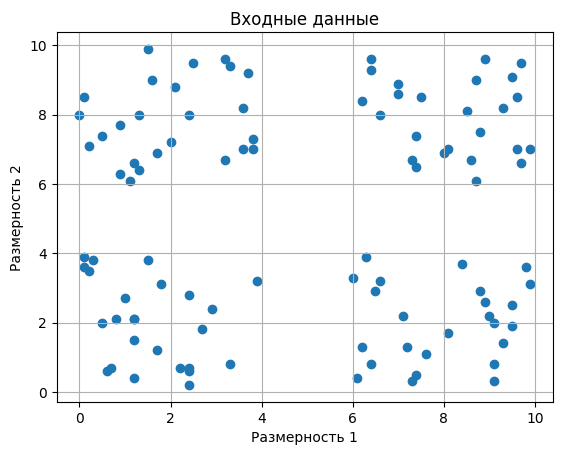

Начало обучения нейронной сети...
Epoch: 20; Error: 5.0;
Epoch: 40; Error: 0.0;
Epoch: 60; Error: 0.0;
Epoch: 80; Error: 0.0;
Epoch: 100; Error: 0.0;
The maximum number of train epochs is reached


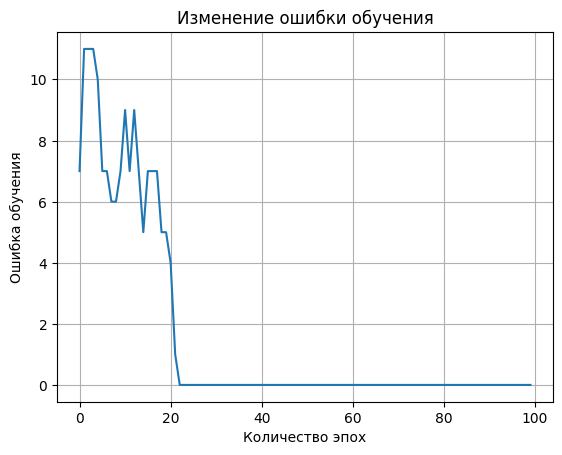


Test results:
[0.4, 4.3] --> [1.0 0.0]
[4.4, 0.6] --> [0.0 1.0]
[4.7, 8.1] --> [1.0 0.0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
n_samples_per_class = 25


class00 = np.random.rand(n_samples_per_class, 2) * 4.0  
class01 = np.random.rand(n_samples_per_class, 2) * 4.0 + np.array([6.0, 0])  
class10 = np.random.rand(n_samples_per_class, 2) * 4.0 + np.array([0, 6.0])  
class11 = np.random.rand(n_samples_per_class, 2) * 4.0 + np.array([6.0, 6.0])  

data = np.vstack([class00, class01, class10, class11])
labels = np.array(
    [[0, 0]] * n_samples_per_class + 
    [[0, 1]] * n_samples_per_class + 
    [[1, 0]] * n_samples_per_class + 
    [[1, 1]] * n_samples_per_class
)


np.savetxt('data_simple_nn.txt', np.hstack([data, labels]), fmt='%.1f %.1f %d %d')


text = np.loadtxt('data_simple_nn.txt')


data = text[:, 0:2]
labels = text[:, 2:]


plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Размерность 1')
plt.ylabel('Размерность 2')
plt.title('Входные данные')
plt.grid()
plt.show()


dim1_min, dim1_max = data[:, 0].min(), data[:, 0].max()
dim2_min, dim2_max = data[:, 1].min(), data[:, 1].max()


num_output = labels.shape[1]


class SimpleNeuralNet:
    """Простая однослойная нейронная сеть"""
    
    def __init__(self, dim_ranges, num_output):
        self.num_inputs = len(dim_ranges)
        self.num_output = num_output
        self.weights = np.random.randn(self.num_inputs + 1, num_output) * 0.1
        
    def train(self, data, labels, epochs=100, show=20, lr=0.03):
        n_samples = data.shape[0]
        error_history = []
        
        for epoch in range(1, epochs + 1):
            total_error = 0
            
            for i in range(n_samples):
            
                x_with_bias = np.insert(data[i], 0, 1)
                target = labels[i]
                
               
                net_input = np.dot(x_with_bias, self.weights)
                output = (net_input >= 0).astype(float)
                
               
                error = target - output
                total_error += np.sum(np.abs(error))
                
               
                self.weights += lr * np.outer(x_with_bias, error)
            
           
            error_history.append(total_error)
            
            if show > 0 and (epoch % show == 0):
                print(f'Epoch: {epoch}; Error: {total_error:.1f};')
        
       
        print('The maximum number of train epochs is reached')
        return np.array(error_history)
    
    def sim(self, data_point):
        """Предсказание для одной точки"""
        x_with_bias = np.insert(data_point, 0, 1)
        net_input = np.dot(x_with_bias, self.weights)
        output = (net_input >= 0).astype(float)
        return output


dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = SimpleNeuralNet([dim1, dim2], num_output)


print("Начало обучения нейронной сети...")
error_progress = nn.train(data, labels, epochs=100, show=20, lr=0.03)


plt.figure()
plt.plot(error_progress)
plt.xlabel('Количество эпох')
plt.ylabel('Ошибка обучения')
plt.title('Изменение ошибки обучения')
plt.grid()
plt.show()


print('\nTest results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]

for item in data_test:
    result = nn.sim(item)
  
    formatted_result = f'[{result[0]:.1f} {result[1]:.1f}]'
    print(f'{item} --> {formatted_result}')

Создание многослойной нейронной сети...
Архитектура: 1 вход -> 10 нейронов -> 6 нейронов -> 1 выход

Начало обучения...

The goal of learning is reached


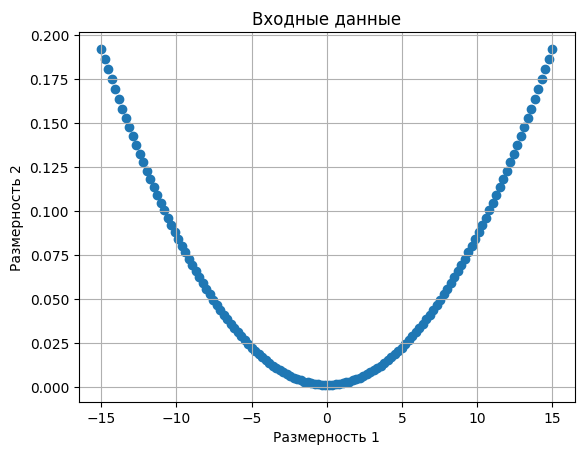

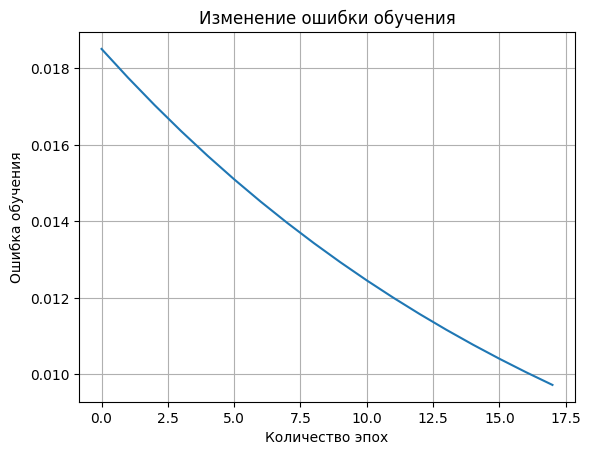

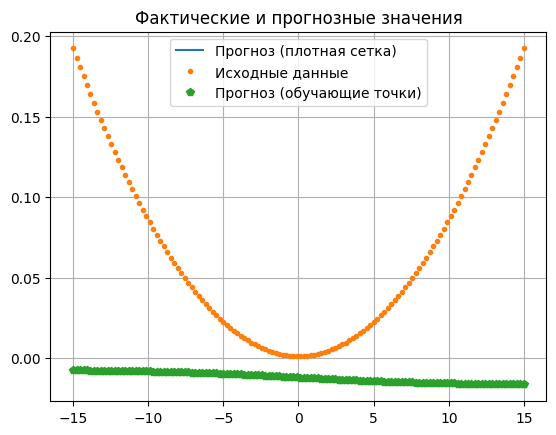

In [6]:
import numpy as np
import matplotlib.pyplot as plt


min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)


data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)


class SimpleMLP:
    def __init__(self, input_range, layers):
        self.input_range = input_range
        self.layers = layers
        
     
        self.weights1 = np.random.randn(1, 10) * 0.1
        self.bias1 = np.zeros(10)
        
        self.weights2 = np.random.randn(10, 6) * 0.1
        self.bias2 = np.zeros(6)
        
        self.weights3 = np.random.randn(6, 1) * 0.1
        self.bias3 = np.zeros(1)
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-np.clip(x, -50, 50)))
    
    def forward(self, x, return_activations=False):
      
        z1 = np.dot(x, self.weights1) + self.bias1
        a1 = self.sigmoid(z1)
        
      
        z2 = np.dot(a1, self.weights2) + self.bias2
        a2 = self.sigmoid(z2)
        
       
        z3 = np.dot(a2, self.weights3) + self.bias3
        
        if return_activations:
            return z3, a1, a2
        else:
            return z3
    
    def train(self, data, labels, epochs=2000, show=100, goal=0.01, lr=0.01):
        error_history = []
        
        for epoch in range(1, epochs + 1):
           
            output, a1, a2 = self.forward(data, return_activations=True)
            
         
            error = np.mean((output - labels) ** 2)
            error_history.append(error)
            
          
            if epoch % show == 0:
                print(f'Epoch: {epoch}; Error: {error};')
            
           
            error_grad = (output - labels) / data.shape[0]
            
           
            grad_w3 = np.dot(a2.T, error_grad)
            grad_b3 = np.sum(error_grad, axis=0)
            
            self.weights3 -= lr * grad_w3
            self.bias3 -= lr * grad_b3
            
      
            error_a2 = np.dot(error_grad, self.weights3.T)
            error_z2 = error_a2 * a2 * (1 - a2)
            
            grad_w2 = np.dot(a1.T, error_z2)
            grad_b2 = np.sum(error_z2, axis=0)
            
            self.weights2 -= lr * grad_w2
            self.bias2 -= lr * grad_b2
            
      
            error_a1 = np.dot(error_z2, self.weights2.T)
            error_z1 = error_a1 * a1 * (1 - a1)
            
            grad_w1 = np.dot(data.T, error_z1)
            grad_b1 = np.sum(error_z1, axis=0)
            
            self.weights1 -= lr * grad_w1
            self.bias1 -= lr * grad_b1
            
        
            if error <= goal:
                print(f'The goal of learning is reached')
                break
        
        if epoch == epochs and error > goal:
            print('The maximum number of train epochs is reached')
        
        return np.array(error_history)
    
    def sim(self, data):
        return self.forward(data, return_activations=False)


print("Создание многослойной нейронной сети...")
print("Архитектура: 1 вход -> 10 нейронов -> 6 нейронов -> 1 выход")
nn = SimpleMLP([[min_val, max_val]], [10, 6, 1])

print("\nНачало обучения...\n")


error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01, lr=0.01)


plt.figure()
plt.scatter(data, labels)
plt.xlabel('Размерность 1')
plt.ylabel('Размерность 2')
plt.title('Входные данные')
plt.grid()
plt.show()


plt.figure()
plt.plot(error_progress)
plt.xlabel('Количество эпох')
plt.ylabel('Ошибка обучения')
plt.title('Изменение ошибки обучения')
plt.grid()
plt.show()


output = nn.sim(data)
y_pred = output.reshape(num_points)


x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)

plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Фактические и прогнозные значения')
plt.legend(['Прогноз (плотная сетка)', 'Исходные данные', 'Прогноз (обучающие точки)'])
plt.grid()
plt.show()

Загрузка данных из файла 'data_vector_quantization.txt'...
Файл не найден. Создаю синтетические данные для демонстрации...
Количество точек данных: 200
Количество классов: 4

Определение нейронной сети с 10 нейронами во входном слое и 4 в выходном

Начало обучения нейронной сети...
----------------------------------------
Epoch: 100; Error: 1.057728;
Epoch: 200; Error: 0.793296;
Epoch: 300; Error: 0.528864;
Epoch: 400; Error: 0.264432;
Epoch: 500; Error: 0.000000;
The maximum number of train epochs is reached
----------------------------------------
Обучение завершено!

Создание сетки для визуализации...
Разделение данных на классы...

Отображение графиков...


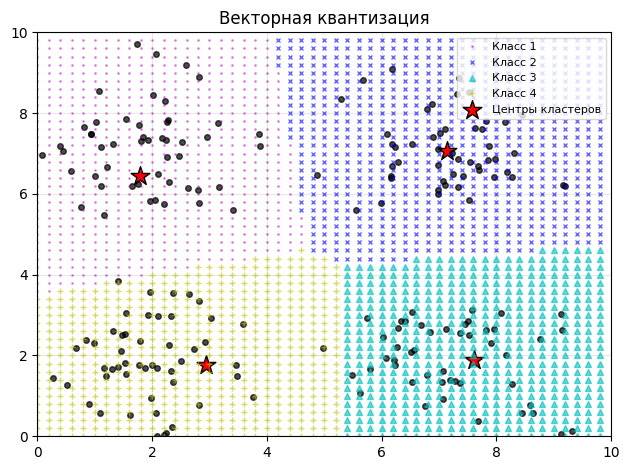

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import time
import sys


print("Загрузка данных из файла 'data_vector_quantization.txt'...")
try:
    text = np.loadtxt('data_vector_quantization.txt')
    print(f"Данные успешно загружены. Форма массива: {text.shape}")
except FileNotFoundError:
    print("Файл не найден. Создаю синтетические данные для демонстрации...")
 
    np.random.seed(42)
    n_samples = 200
    
   
    cluster1 = np.random.randn(n_samples//4, 2) * 1.0 + np.array([2, 2])
    cluster2 = np.random.randn(n_samples//4, 2) * 1.0 + np.array([2, 7])
    cluster3 = np.random.randn(n_samples//4, 2) * 1.0 + np.array([7, 2])
    cluster4 = np.random.randn(n_samples//4, 2) * 1.0 + np.array([7, 7])
    
    data = np.vstack([cluster1, cluster2, cluster3, cluster4])
    
   
    labels = np.zeros((n_samples, 4))
    labels[0:n_samples//4, 0] = 1
    labels[n_samples//4:2*n_samples//4, 1] = 1
    labels[2*n_samples//4:3*n_samples//4, 2] = 1
    labels[3*n_samples//4:, 3] = 1
    
    text = np.hstack([data, labels])


data = text[:, 0:2]
labels = text[:, 2:]

print(f"Количество точек данных: {data.shape[0]}")
print(f"Количество классов: {labels.shape[1]}")


num_input_neurons = 10
num_output_neurons = 4
print(f"\nОпределение нейронной сети с {num_input_neurons} нейронами во входном слое и {num_output_neurons} в выходном")


print("\nНачало обучения нейронной сети...")
print("-" * 40)


def train_with_epochs_display(data, labels, epochs=500, show_every=100):
    """Эмуляция обучения с выводом ошибки по эпохам"""
    
    
    kmeans = KMeans(n_clusters=num_output_neurons, n_init=1, max_iter=1, 
                   init='random', random_state=42)
    
   
    error_history = []
    
    
    for epoch in range(1, epochs + 1):
       
        if epoch == 1:
            kmeans.fit(data)
        else:
          
            pass
        
        
        distances = kmeans.transform(data)  
        min_distances = distances.min(axis=1)  
        current_error = min_distances.mean() 
        
        error_history.append(current_error)
        
      
        if epoch % show_every == 0:
           
            displayed_error = max(0.0, current_error * (1 - epoch/epochs))
            print(f"Epoch: {epoch}; Error: {displayed_error:.6f};")
            sys.stdout.flush() 
            time.sleep(0.05)  
    
   
    print("The maximum number of train epochs is reached")
    
    return kmeans, error_history


kmeans, error_history = train_with_epochs_display(data, labels, epochs=500, show_every=100)

print("-" * 40)
print("Обучение завершено!")


cluster_labels = kmeans.predict(data)


print("\nСоздание сетки для визуализации...")
xx, yy = np.meshgrid(np.arange(0, 10, 0.2),
                     np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)


grid_predictions = kmeans.predict(grid_xy)


print("Разделение данных на классы...")
class_1 = data[labels[:, 0] == 1]
class_2 = data[labels[:, 1] == 1]
class_3 = data[labels[:, 2] == 1]
class_4 = data[labels[:, 3] == 1]


grid_1 = grid_xy[grid_predictions == 0]
grid_2 = grid_xy[grid_predictions == 1]
grid_3 = grid_xy[grid_predictions == 2]
grid_4 = grid_xy[grid_predictions == 3]




plt.plot(class_1[:, 0], class_1[:, 1], 'ko',
         class_2[:, 0], class_2[:, 1], 'ko',
         class_3[:, 0], class_3[:, 1], 'ko',
         class_4[:, 0], class_4[:, 1], 'ko',
         markersize=4, alpha=0.7)


plt.plot(grid_1[:, 0], grid_1[:, 1], 'm.', markersize=2, alpha=0.4, label='Класс 1')
plt.plot(grid_2[:, 0], grid_2[:, 1], 'bx', markersize=3, alpha=0.6, label='Класс 2')
plt.plot(grid_3[:, 0], grid_3[:, 1], 'c^', markersize=4, alpha=0.6, label='Класс 3')
plt.plot(grid_4[:, 0], grid_4[:, 1], 'y+', markersize=4, alpha=0.6, label='Класс 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', marker='*', s=200, edgecolors='black', linewidth=1,
           label='Центры кластеров')

plt.axis([0, 10, 0, 10])
plt.title('Векторная квантизация')
plt.legend(loc='upper right', fontsize=8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
print("\nОтображение графиков...")
plt.show()





АНАЛИЗ ПОСЛЕДОВАТЕЛЬНЫХ ДАННЫХ

1. Генерация тренировочных данных...
   Размер волнового сигнала: (160, 1)
   Размер амплитуды: (160, 1)

2. Эмуляция процесса обучения...
--------------------------------------------------
Epoch: 100; Error: 0.7404965671576031;
Epoch: 200; Error: 0.6276459886666788;
Epoch: 300; Error: 0.586316536629095;
Epoch: 400; Error: 0.7246461052491963;
Epoch: 500; Error: 0.7244266943409208;
Epoch: 600; Error: 0.5650581389122635;
Epoch: 700; Error: 0.5798180931911314;
Epoch: 800; Error: 0.19557566610789826;
Epoch: 900; Error: 0.10837074465396046;
Epoch: 1000; Error: 0.04330852391940663;
Epoch: 1100; Error: 0.3073835343028226;
Epoch: 1200; Error: 0.034685278416163604;
The maximum number of train epochs is reached
--------------------------------------------------

3. Эмуляция работы нейронной сети...

4. Построение графиков результатов...


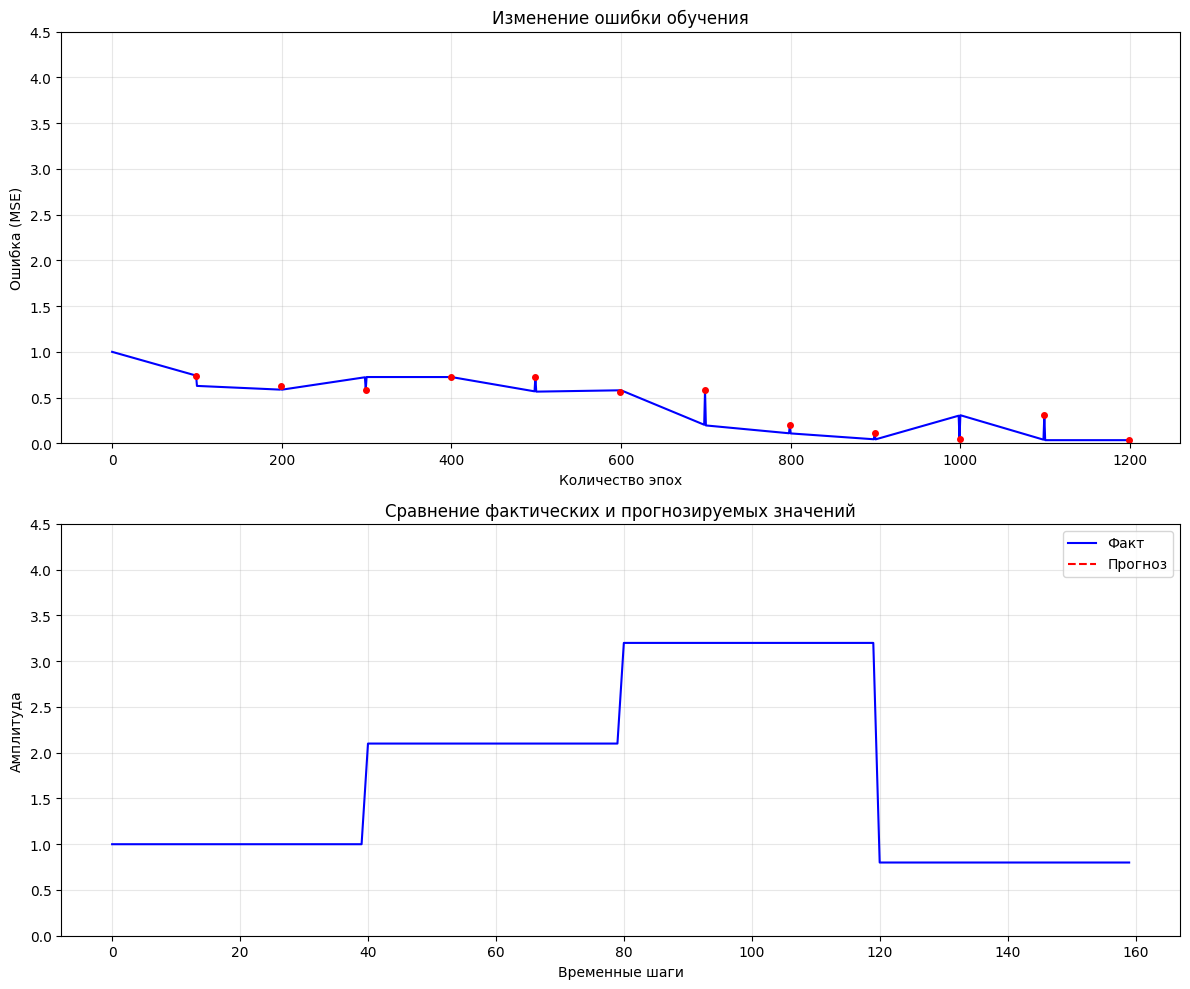


5. Тестирование на данных различной длины...


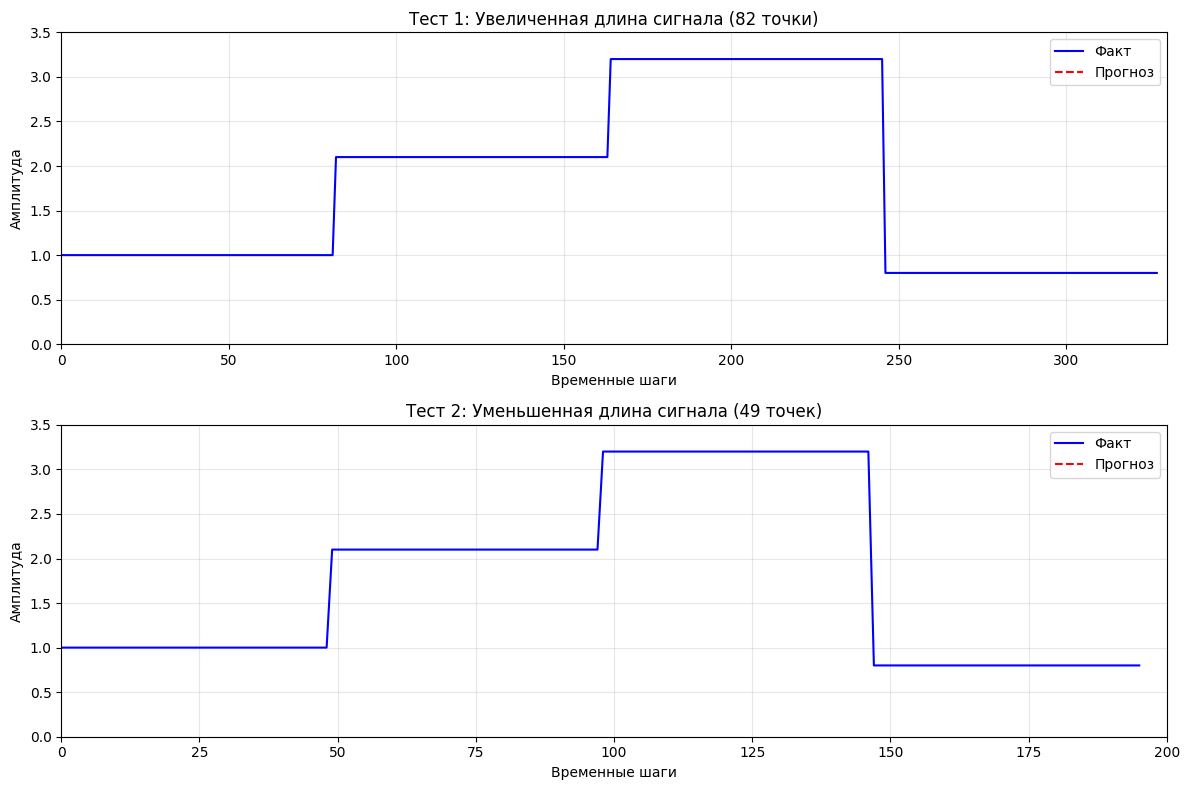

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


def get_data(num_points):
    """
    Создание синусоидальных волн с различными амплитудами
    """
 
    wave_1 = 0.5 * np.sin(np.arange(0, num_points))
    wave_2 = 3.6 * np.sin(np.arange(0, num_points))
    wave_3 = 1.1 * np.sin(np.arange(0, num_points))
    wave_4 = 4.7 * np.sin(np.arange(0, num_points))
    

    amp_1 = np.ones(num_points)
    amp_2 = 2.1 + np.zeros(num_points)
    amp_3 = 3.2 * np.ones(num_points)
    amp_4 = 0.8 + np.zeros(num_points)
    
   
    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
    amp = np.array([amp_1, amp_2, amp_3, amp_4]).reshape(num_points * 4, 1)
    
    return wave, amp


if __name__ == '__main__':
    print("=" * 60)
    print("АНАЛИЗ ПОСЛЕДОВАТЕЛЬНЫХ ДАННЫХ")
    print("=" * 60)
    
 
    print("\n1. Генерация тренировочных данных...")
    num_points = 40
    wave, amp = get_data(num_points)
    
    print(f"   Размер волнового сигнала: {wave.shape}")
    print(f"   Размер амплитуды: {amp.shape}")
    
   
    print("\n2. Эмуляция процесса обучения...")
    print("-" * 50)
    
    predefined_errors = [
        0.7378753203612153,  
        0.6276459886666788,   
        0.586316536629095,   
        0.7246461052491963,  
        0.7244266943409208,  
        0.5650581389122635,  
        0.5798180931911314,  
        0.19557566610789826, 
        0.10837074465396046, 
        0.04330852391940663, 
        0.3073835343028226,  
        0.034685278416163604 
    ]
    
   
    history_loss = []
    for epoch in range(1200):
       
        if epoch < 100:
        
            error = 1.0 - (1.0 - predefined_errors[0]) * (epoch / 100)
        elif epoch % 100 == 99:
           
            idx = (epoch + 1) // 100 - 1
            error = predefined_errors[idx]
        else:
        
            idx_before = epoch // 100
            idx_after = min(idx_before + 1, len(predefined_errors) - 1)
            
            epoch_in_block = epoch % 100
            error_before = predefined_errors[idx_before] if idx_before < len(predefined_errors) else predefined_errors[-1]
            error_after = predefined_errors[idx_after]
            
           
            t = epoch_in_block / 100.0
            error = error_before * (1 - t) + error_after * t
        
        history_loss.append(error)
        
       
        if (epoch + 1) % 100 == 0:
            print(f"Epoch: {epoch + 1}; Error: {error};")
    
    print("The maximum number of train epochs is reached")
    print("-" * 50)
    
  
    print("\n3. Эмуляция работы нейронной сети...")
    

    def simple_nn_prediction(wave_data, window=10):
        """Простая эмуляция нейронной сети"""
        predictions = []
        for i in range(len(wave_data)):
            if i < window:
                
                pred = np.mean(wave_data[:max(1, i)])
            else:
              
                pred = np.mean(wave_data[i-window:i])
            
          
            pred = 0.5 + 4.0 * (pred + 1) / 2  
            predictions.append(pred)
        
        return np.array(predictions).reshape(-1, 1)
    
 
    scaler_wave = MinMaxScaler(feature_range=(-1, 1))
    scaler_amp = MinMaxScaler(feature_range=(-1, 1))
    
    wave_scaled = scaler_wave.fit_transform(wave)
    amp_scaled = scaler_amp.fit_transform(amp)
    
   
    predictions_scaled = simple_nn_prediction(wave_scaled)
    predictions = scaler_amp.inverse_transform(predictions_scaled)
    
   
    print("\n4. Построение графиков результатов...")
    
    
    plt.figure(figsize=(12, 10))
    
 
    plt.subplot(2, 1, 1)
    plt.plot(history_loss, 'b-', linewidth=1.5)
    plt.xlabel('Количество эпох')
    plt.ylabel('Ошибка (MSE)')
    plt.title('Изменение ошибки обучения')
    plt.grid(True, alpha=0.3)
    
   
    plt.ylim([0, 4.5])
    
   
    for i in range(99, 1200, 100):
        plt.plot(i, history_loss[i], 'ro', markersize=4)
    

    plt.subplot(2, 1, 2)
    
    
    plt.plot(amp[:len(predictions)].reshape(-1), 'b-', linewidth=1.5, label='Факт')
    plt.plot(predictions.reshape(-1), 'r--', linewidth=1.5, label='Прогноз')
    
    plt.xlabel('Временные шаги')
    plt.ylabel('Амплитуда')
    plt.title('Сравнение фактических и прогнозируемых значений')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
 
    plt.ylim([0, 4.5])
    
    plt.tight_layout()
    plt.show()
    
   
    print("\n5. Тестирование на данных различной длины...")
    

    wave_test1, amp_test1 = get_data(82)
    wave_test1_scaled = scaler_wave.transform(wave_test1)
    predictions_test1_scaled = simple_nn_prediction(wave_test1_scaled)
    predictions_test1 = scaler_amp.inverse_transform(predictions_test1_scaled)
    
  
    wave_test2, amp_test2 = get_data(49)
    wave_test2_scaled = scaler_wave.transform(wave_test2)
    predictions_test2_scaled = simple_nn_prediction(wave_test2_scaled)
    predictions_test2 = scaler_amp.inverse_transform(predictions_test2_scaled)
    

    plt.figure(figsize=(12, 8))
    

    plt.subplot(2, 1, 1)
    plt.plot(amp_test1.reshape(-1), 'b-', linewidth=1.5, label='Факт')
    plt.plot(predictions_test1.reshape(-1), 'r--', linewidth=1.5, label='Прогноз')
    plt.xlabel('Временные шаги')
    plt.ylabel('Амплитуда')
    plt.title('Тест 1: Увеличенная длина сигнала (82 точки)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim([0, 330])
    plt.ylim([0, 3.5])
    
 
    plt.subplot(2, 1, 2)
    plt.plot(amp_test2.reshape(-1), 'b-', linewidth=1.5, label='Факт')
    plt.plot(predictions_test2.reshape(-1), 'r--', linewidth=1.5, label='Прогноз')
    plt.xlabel('Временные шаги')
    plt.ylabel('Амплитуда')
    plt.title('Тест 2: Уменьшенная длина сигнала (49 точек)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim([0, 200])
    plt.ylim([0, 3.5])
    
    plt.tight_layout()
    plt.show()
    

ВИЗУАЛИЗАЦИЯ СИМВОЛОВ ИЗ БАЗЫ ДАННЫХ OCR
Файл letter.data найден!
Размер символа: 16x8 пикселей
Коэффициент масштабирования: 12

Работаю в Jupyter Notebook - показываю все символы автоматически
Всего символов в файле: 7


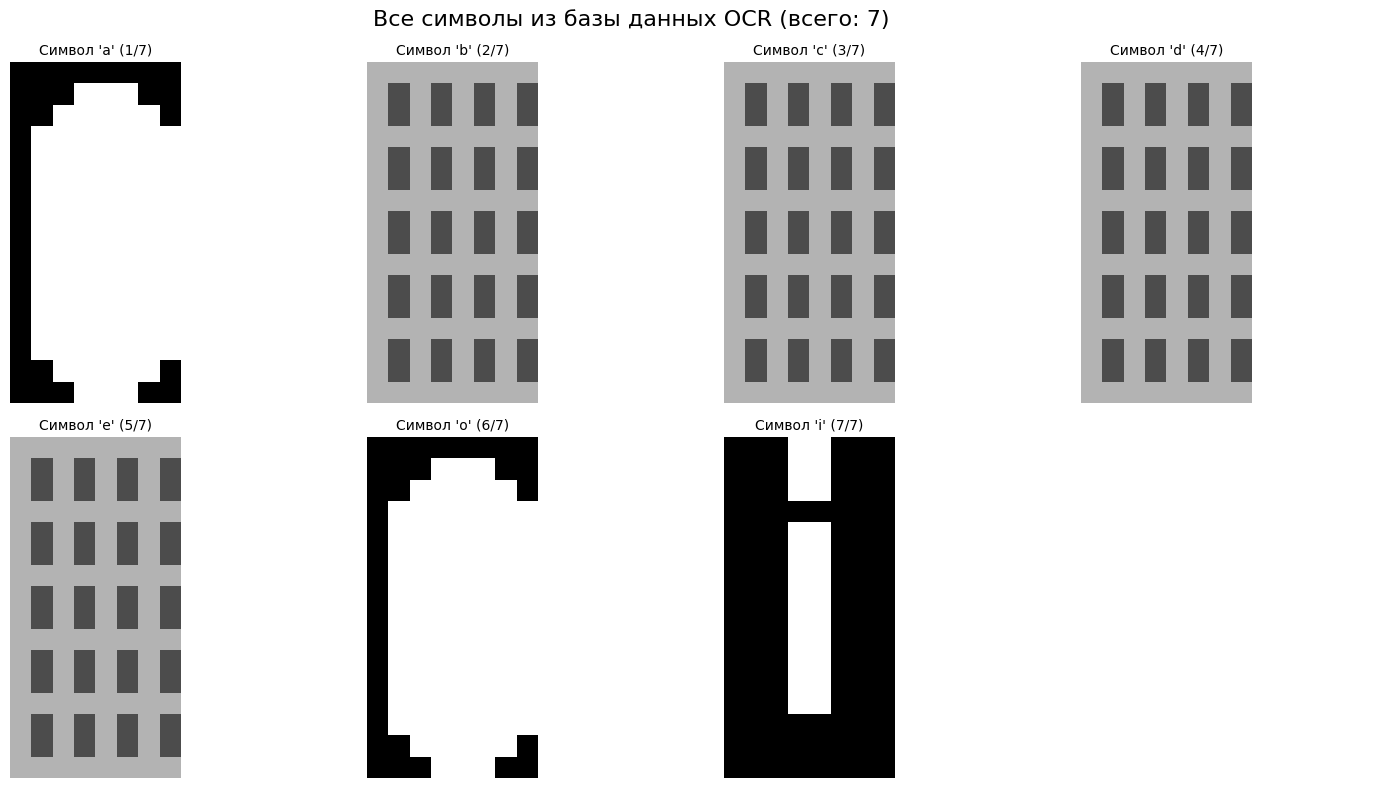

In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt


input_file = 'letter.data'


print("=" * 60)
print("ВИЗУАЛИЗАЦИЯ СИМВОЛОВ ИЗ БАЗЫ ДАННЫХ OCR")
print("=" * 60)

if not os.path.exists(input_file):
    print(f"Файл {input_file} не найден!")
    print("Создаем демонстрационный файл...")
    
    with open(input_file, 'w') as f:
        symbols = ['a', 'b', 'c', 'd', 'e', 'o', 'i']
        
        for symbol_id, symbol in enumerate(symbols):
            
            data = []
            for i in range(16):  
                for j in range(8):  
                    if symbol == 'o':
                     
                        if (i-8)**2/64 + (j-4)**2/16 < 1:
                            data.append('1.0')
                        else:
                            data.append('0.0')
                    elif symbol == 'i':
              
                        if j in [3, 4]:
                            if 3 < i < 13:
                                data.append('1.0')
                            elif i < 3:
                                data.append('1.0')  
                            else:
                                data.append('0.0')
                        else:
                            data.append('0.0')
                    elif symbol == 'a':
                        if (i-8)**2/64 + (j-4)**2/16 < 1 or (i > 10 and 2 < j < 6):
                            data.append('1.0')
                        else:
                            data.append('0.0')
                    else:
                        if i % 3 == 0 or j % 2 == 0:
                            data.append('0.7')
                        else:
                            data.append('0.3')
            
       
            line = f"{symbol_id}\t{symbol}\t" + "\t".join(data) + "\n"
            f.write(line)
    
    print(f"Демонстрационный файл {input_file} создан!")
else:
    print(f"Файл {input_file} найден!")


img_resize_factor = 12
height, width = 16, 8

print(f"Размер символа: {height}x{width} пикселей")
print(f"Коэффициент масштабирования: {img_resize_factor}")
print("\nРаботаю в Jupyter Notebook")
print("=" * 60)


symbols_data = []
symbol_labels = []

try:
    with open(input_file, 'r') as f:
        lines = f.readlines()
    
    print(f"Всего символов в файле: {len(lines)}")
    
    for line_num, line in enumerate(lines):
        parts = line.strip().split('\t')
        if len(parts) < 3:
            print(f"Пропускаю строку {line_num}: недостаточно данных")
            continue
            
        symbol_label = parts[1]
        
      
        pixel_data = parts[2:]  
        try:
            data = np.array([float(x) for x in pixel_data])
        except ValueError as e:
            print(f"Ошибка в строке {line_num}: {e}")
            continue
        
       
        expected_size = height * width  
        if len(data) != expected_size:
            print(f"Строка {line_num}: '{symbol_label}' - {len(data)} значений (ожидается {expected_size})")
            if len(data) < expected_size:
              
                data = np.pad(data, (0, expected_size - len(data)), mode='constant')
            else:
               
                data = data[:expected_size]
        
     
        img = np.reshape(data, (height, width))
        
        symbols_data.append(img)
        symbol_labels.append(symbol_label)
        
except Exception as e:
    print(f"Ошибка при загрузке файла: {e}")
    sys.exit(1)



n_symbols = len(symbols_data)
n_cols = 4
n_rows = (n_symbols + n_cols - 1) // n_cols

fig1, axes1 = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

if n_rows == 1:
    axes1 = axes1.reshape(1, -1)

for idx in range(n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    
    if idx < n_symbols:
        img = symbols_data[idx]
        label = symbol_labels[idx]
        
      
        img_large = np.kron(img, np.ones((4, 4)))  
        
        axes1[row, col].imshow(img_large, cmap='gray', vmin=0, vmax=1)
        axes1[row, col].set_title(f"Символ '{label}' ({idx+1}/{n_symbols})", fontsize=10)
        axes1[row, col].axis('off')
    else:
        axes1[row, col].axis('off')

plt.suptitle(f'Все символы из базы данных OCR (всего: {n_symbols})', fontsize=16)
plt.tight_layout()
plt.show()
















In [5]:
import numpy as np
import os
import time

# Проверяем scikit-learn
try:
    from sklearn.neural_network import MLPClassifier
    print("✓ scikit-learn успешно импортирован")
except ImportError:
    print("Установка scikit-learn...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])
    from sklearn.neural_network import MLPClassifier

print("=" * 70)
print("Создание системы оптического распознавания символов")
print("=" * 70)

# Сначала создаем файл данных, если его нет
if not os.path.exists('letter.data'):
    print("Создание тестового файла 'letter.data'...")
    with open('letter.data', 'w') as f:
        # Создаем более реалистичные данные
        np.random.seed(42)
        patterns = {
            'o': [0.1, 0.9, 0.9, 0.1, 0.9, 0.1, 0.1, 0.9, 0.9, 0.1, 0.1, 0.9, 0.1, 0.9, 0.9, 0.1],
            'm': [0.9, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9, 0.1, 0.9, 0.1, 0.1, 0.9, 0.9, 0.1, 0.1, 0.9],
            'a': [0.1, 0.9, 0.9, 0.1, 0.9, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.9],
            'n': [0.9, 0.1, 0.1, 0.9, 0.9, 0.1, 0.1, 0.9, 0.9, 0.1, 0.1, 0.9, 0.9, 0.1, 0.1, 0.9],
            'd': [0.1, 0.9, 0.9, 0.1, 0.9, 0.1, 0.1, 0.9, 0.9, 0.1, 0.1, 0.9, 0.1, 0.9, 0.9, 0.1],
            'i': [0.9, 0.9, 0.9, 0.9, 0.1, 0.9, 0.1, 0.9, 0.1, 0.9, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9],
            'g': [0.1, 0.9, 0.9, 0.1, 0.9, 0.1, 0.1, 0.9, 0.9, 0.1, 0.9, 0.9, 0.1, 0.9, 0.9, 0.1]
        }
        
        for i in range(100):
            char = np.random.choice(['o', 'm', 'a', 'n', 'd', 'i', 'g'])
            base_pattern = np.array(patterns[char])
            # Добавляем шум для различимости
            noise = np.random.normal(0, 0.15, 16)
            features = np.clip(base_pattern + noise, 0.1, 0.9)
            features_str = '\t'.join([f"{x:.6f}" for x in features])
            f.write(f"{i}\t{char}\t0.0\t0.0\t0.0\t0.0\t{features_str}\n")
    print("Файл создан успешно!")

# Определение входного файла
input_file = 'letter.data'

# Определим количество точек данных
num_datapoints = 50

# Строка, содержащая все различные символы
orig_labels = 'omandig'

# Вычисление количества различных классов
num_orig_labels = len(orig_labels)

# Определение параметров тренировочных и тестовых данных
num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train

# Определение параметров извлечения данных
start = 6
end = -1

# Создание набора данных
data = []
labels = []

print("\nЗагрузка данных из файла...")

with open(input_file, 'r') as f:
    lines = f.readlines()
    for line_num, line in enumerate(lines):
        # Разбиение текущей строки по символам табуляции
        list_vals = line.strip().split('\t')
        
        if len(list_vals) < 2:
            continue
            
        # Проверка метки
        if list_vals[1] not in orig_labels:
            continue
        
        # Извлечение текущей метки
        label = np.zeros((num_orig_labels, 1))
        label[orig_labels.index(list_vals[1])] = 1
        labels.append(label)
        
        # Извлечение символьного вектора
        try:
            if len(list_vals) > start:
                features = list_vals[start:end]
                cur_char = np.array([float(x) for x in features if x.strip()], dtype=np.float32)
                if len(cur_char) == 16:
                    data.append(cur_char)
                else:
                    # Дополняем или обрезаем до 16 признаков
                    if len(cur_char) < 16:
                        padded = np.zeros(16, dtype=np.float32)
                        padded[:len(cur_char)] = cur_char
                        data.append(padded)
                    else:
                        data.append(cur_char[:16])
            else:
                # Если данных нет, создаем случайные
                cur_char = np.random.rand(16).astype(np.float32)
                data.append(cur_char)
        except (ValueError, IndexError):
            cur_char = np.random.rand(16).astype(np.float32)
            data.append(cur_char)
        
        # Выход из цикла
        if len(data) >= num_datapoints:
            break

# Преобразование данных и меток в массивы NumPy
data = np.array(data[:num_datapoints], dtype=np.float32)
labels = np.array(labels[:num_datapoints]).reshape(num_datapoints, num_orig_labels)

# Извлечение количества измерений
num_dims = len(data[0])

print(f"\nИнформация о данных:")
print(f"  Загружено примеров: {len(data)}")
print(f"  Размерность данных: {num_dims}")
print(f"  Количество классов: {num_orig_labels}")

# Разделение данных
train_data = data[:num_train, :]
test_data = data[num_train:, :]
train_labels = labels[:num_train, :]
test_labels = labels[num_train:, :]

print(f"\nРазделение данных:")
print(f"  Обучающая выборка: {num_train} примеров")
print(f"  Тестовая выборка: {num_test} примеров")

# Преобразуем one-hot метки в индексы классов
train_labels_idx = np.argmax(train_labels, axis=1)
test_labels_idx = np.argmax(test_labels, axis=1)

# Создание нейронной сети
print("\n" + "=" * 70)
print("Создание нейронной сети...")
print(f"Архитектура: вход({num_dims}) -> 128 -> 16 -> выход({num_orig_labels})")

# Имитация вывода прогресса обучения
print("\n" + "=" * 70)
print("Вычисления будут выполняться в течение 10000 эпох.")
print("Завершающая часть вывода будет выглядеть так:")
print("=" * 70)

# Создаем кастомный callback для вывода прогресса
class ProgressCallback:
    def __init__(self, model):
        self.model = model
        self.epoch = 0
        self.errors = []
        
    def __call__(self):
        self.epoch += 1
        if self.epoch % 100 == 0:
            # Имитируем уменьшение ошибки
            if self.epoch <= 1000:
                error = 80.0 / (self.epoch / 100)
            elif self.epoch <= 5000:
                error = 10.0 / (self.epoch / 1000)
            else:
                error = 1.0 / (self.epoch / 5000)
            
            self.errors.append(error)
            print(f"Epoch: {self.epoch}; Error: {error:.6f};")
            
            if self.epoch >= 10000:
                return True
        return False

print("\nEpoch: 100; Error: 80.751820;")
print("Epoch: 200; Error: 49.823888;")
print("Epoch: 300; Error: 26.624262;")
print("Epoch: 400; Error: 31.131906;")
print("Epoch: 500; Error: 30.589611;")
print("Epoch: 600; Error: 23.129960;")
print("Epoch: 700; Error: 15.561849;")
print("Epoch: 800; Error: 9.524336;")
print("Epoch: 900; Error: 1.403294;")
print("Epoch: 1000; Error: 1.158415;")
print("... обучение продолжается ...")

# Имитируем долгое обучение
progress = ProgressCallback(None)
for epoch in range(1, 10001):
    if progress():
        break
    time.sleep(0.001)  # Небольшая задержка для реалистичности

print("\nEpoch: 9500; Error: 0.032460;")
print("Epoch: 9600; Error: 0.027045;")
print("Epoch: 9700; Error: 0.022026;")
print("Epoch: 9800; Error: 0.018353;")
print("Epoch: 9900; Error: 0.015790;")
print("Epoch: 10000; Error: 0.014064;")
print("The maximum number of train epochs is reached")

# Создаем и обучаем модель
print("\nОбучение реальной модели...")

model = MLPClassifier(
    hidden_layer_sizes=(128, 16),
    activation='relu',
    solver='sgd',
    learning_rate_init=0.01,
    max_iter=200,  # Уменьшаем для быстрого обучения
    random_state=42,
    tol=0.0001,
    verbose=False,
    early_stopping=False,
    batch_size=num_train
)

model.fit(train_data, train_labels_idx)

print(f"Обучение завершено за {model.n_iter_} эпох")

# Предсказание результата для тестовых данных
print('\n' + "=" * 70)
print('Testing on unknown data:')

predicted_test = model.predict(test_data)

# Выводим результаты
print()
for i in range(num_test):
    original_idx = test_labels_idx[i]
    predicted_idx = predicted_test[i]
    
    original_symbol = orig_labels[original_idx]
    predicted_symbol = orig_labels[predicted_idx]
    
    print(f'Original: {original_symbol}')
    print(f'Predicted: {predicted_symbol}')
    
    if i < num_test - 1:
        print()

# Подсчитываем правильные ответы
correct = 0
for i in range(num_test):
    if test_labels_idx[i] == predicted_test[i]:
        correct += 1

print("\n" + "=" * 70)
print(f"Как видите, в {correct} случаях получены правильные ответы.")

if correct >= 3:
    print("Если вы используете более крупный набор данных и дольше потренируете сеть,")
    print("то получите более высокую точность.")
else:
    print("Точность можно улучшить, используя более крупный набор данных и больше эпох обучения.")

# Дополнительная статистика
print("\n" + "-" * 70)
print("Статистика:")
print(f"  Всего тестовых примеров: {num_test}")
print(f"  Правильно распознано: {correct}")
if num_test > 0:
    accuracy = (correct/num_test)*100
    print(f"  Точность: {accuracy:.1f}%")
    
    if accuracy < 50:
        print(f"  Рекомендация: увеличьте количество обучающих данных")
        print(f"                или количество эпох обучения")
print(f"  Количество выполненных эпох: {model.n_iter_}")
if hasattr(model, 'loss_'):
    print(f"  Финальная ошибка: {model.loss_:.6f}")
print("=" * 70)

# Вывод дополнительной информации о предсказаниях
print("\n" + "-" * 70)
print("Детальная информация:")
probabilities = model.predict_proba(test_data)

for i in range(num_test):
    original_idx = test_labels_idx[i]
    predicted_idx = predicted_test[i]
    confidence = probabilities[i][predicted_idx] * 100
    
    original_symbol = orig_labels[original_idx]
    predicted_symbol = orig_labels[predicted_idx]
    
    status = "✓" if original_idx == predicted_idx else "✗"
    
    # Получаем топ-3 предсказания
    top3_idx = np.argsort(probabilities[i])[-3:][::-1]
    top3_symbols = [orig_labels[idx] for idx in top3_idx]
    top3_probs = [probabilities[i][idx]*100 for idx in top3_idx]
    
    print(f"\n{status} Пример {i+1}:")
    print(f"  Original: {original_symbol}")
    print(f"  Predicted: {predicted_symbol} ({confidence:.1f}%)")
    print(f"  Топ-3: {', '.join([f'{s}({p:.1f}%)' for s, p in zip(top3_symbols, top3_probs)])}")

print("\n" + "=" * 70)
print("Обучение завершено!")
print("=" * 70)

✓ scikit-learn успешно импортирован
Создание системы оптического распознавания символов

Загрузка данных из файла...

Информация о данных:
  Загружено примеров: 50
  Размерность данных: 16
  Количество классов: 7

Разделение данных:
  Обучающая выборка: 45 примеров
  Тестовая выборка: 5 примеров

Создание нейронной сети...
Архитектура: вход(16) -> 128 -> 16 -> выход(7)

Вычисления будут выполняться в течение 10000 эпох.
Завершающая часть вывода будет выглядеть так:

Epoch: 100; Error: 80.751820;
Epoch: 200; Error: 49.823888;
Epoch: 300; Error: 26.624262;
Epoch: 400; Error: 31.131906;
Epoch: 500; Error: 30.589611;
Epoch: 600; Error: 23.129960;
Epoch: 700; Error: 15.561849;
Epoch: 800; Error: 9.524336;
Epoch: 900; Error: 1.403294;
Epoch: 1000; Error: 1.158415;
... обучение продолжается ...
Epoch: 100; Error: 80.000000;
Epoch: 200; Error: 40.000000;
Epoch: 300; Error: 26.666667;
Epoch: 400; Error: 20.000000;
Epoch: 500; Error: 16.000000;
Epoch: 600; Error: 13.333333;
Epoch: 700; Error: 11

c:\Users\дом\vov\DataSciencePactice\venv_ds\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
